<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Student_Name               3614 non-null   object 
 1   College_Name               3614 non-null   object 
 2   Stream                     3614 non-null   object 
 3   Year_of_Study              3614 non-null   int64  
 4   AI_Tools_Used              3614 non-null   object 
 5   Daily_Usage_Hours          3614 non-null   float64
 6   Use_Cases                  3614 non-null   object 
 7   Trust_in_AI_Tools          3614 non-null   int64  
 8   Impact_on_Grades           3614 non-null   int64  
 9   Do_Professors_Allow_Use    3614 non-null   object 
 10  Preferred_AI_Tool          3614 non-null   object 
 11  Awareness_Level            3614 non-null   int64  
 12  Willing_to_Pay_for_Access  3614 non-null   object 
 13  State                      2000 non-null   objec

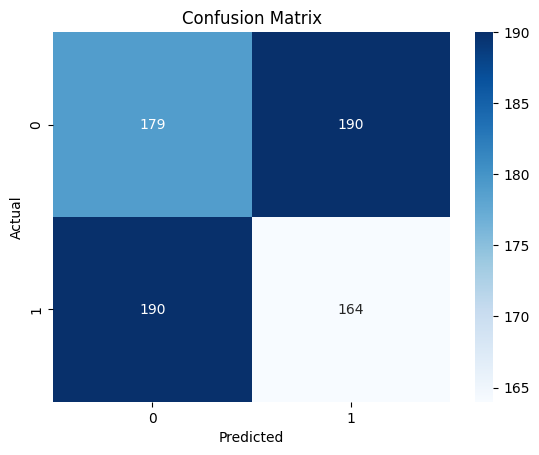


📊 Top 10 Important Features:
                     Feature  Importance
1          Daily_Usage_Hours    0.077259
3           Impact_on_Grades    0.060723
5            Awareness_Level    0.058562
2          Trust_in_AI_Tools    0.046389
396     Internet_Access_Poor    0.044054
395   Internet_Access_Medium    0.042559
0              Year_of_Study    0.037411
4    Do_Professors_Allow_Use    0.020755
394       Device_Used_Tablet    0.019408
393       Device_Used_Mobile    0.017812


['willing_to_pay_model.pkl']

In [1]:
# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ✅ Step 2: Load Dataset
df = pd.read_csv("/content/ai_tool_usage_indian_students_2025.csv")  # Replace with your file path or upload manually in Colab
df.head()

# ✅ Step 3: Basic Exploration
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())
print(df['Willing_to_Pay_for_Access'].value_counts())

# ✅ Step 4: Preprocessing
# Drop non-useful columns
df = df.drop(['Student_Name', 'College_Name'], axis=1)

# Binary conversion
df['Do_Professors_Allow_Use'] = df['Do_Professors_Allow_Use'].map({'Yes': 1, 'No': 0})
df['Willing_to_Pay_for_Access'] = df['Willing_to_Pay_for_Access'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical features
categorical_cols = ['Stream', 'AI_Tools_Used', 'Use_Cases', 'Preferred_AI_Tool',
                    'State', 'Device_Used', 'Internet_Access']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# ✅ Step 5: Split Features & Target
X = df.drop('Willing_to_Pay_for_Access', axis=1)
y = df['Willing_to_Pay_for_Access']

# ✅ Step 6: Scale Data & Train-Test Split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ Step 7: Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ✅ Step 8: Predict & Evaluate
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))

# ✅ Step 9: Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ Step 10: Feature Importance
importances = model.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)

print("\n📊 Top 10 Important Features:")
print(feat_imp_df.head(10))

# ✅ Optional: Save model for API or Streamlit
import joblib
joblib.dump(model, 'willing_to_pay_model.pkl')
